In [1]:
from data import DogeDataset

import torch

from torchvision.transforms.v2 import (
    Compose, Resize, CenterCrop, ToDtype,
)

transformer = Compose([
    Resize(224),
    CenterCrop((224, 224)),
])

train = DogeDataset(root_path='./dataset', train=True, transformer=transformer)
test = DogeDataset(root_path='./dataset', train=False, transformer=transformer)

print(f'{len(train):,} training samples')
print(f'{len(test):,} testing samples')

12,000 training samples
8,580 testing samples


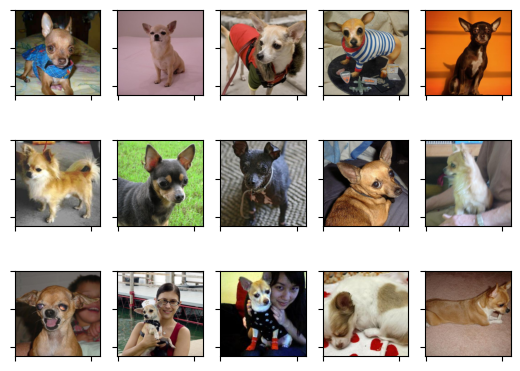

In [24]:
from matplotlib import pyplot as plt

from torchvision.utils import make_grid
from torch.utils.data import Subset

figure, axis = plt.subplots(nrows=3, ncols=5, squeeze=False)

samples = Subset(train, indices=range(0, 15))

for i, (image, label, box) in enumerate(samples):
    image = image.permute(1, 2, 0) # C x W x H -> W x H x C

    axis[i // 5, i % 5].imshow(image)
    axis[i // 5, i % 5].set(xticklabels=[], yticklabels=[])

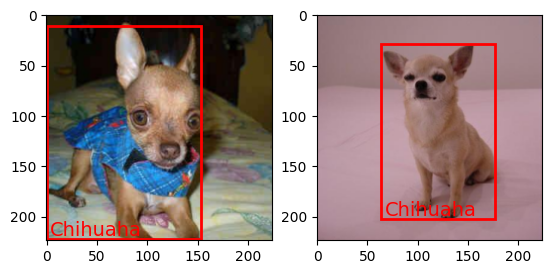

In [35]:
from matplotlib.patches import Rectangle

figure, axis = plt.subplots(nrows=1, ncols=2, squeeze=False)

samples = Subset(train, indices=range(0, 2))

for i, (image, label, box) in enumerate(samples):
    image = image.permute(1, 2, 0) # C x W x H -> W x H x C

    breed = DogeDataset.CLASS_MAPPING[label]

    xmin, ymin, xmax, ymax = box

    xy, width, height = (xmin, ymin), xmax - xmin, ymax - ymin

    patch = Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')

    axis[0, i].imshow(image)
    axis[0, i].add_patch(patch)
    axis[0, i].text(xmin + 3, ymax - 3, breed, fontsize=14, color='r')

plt.show()

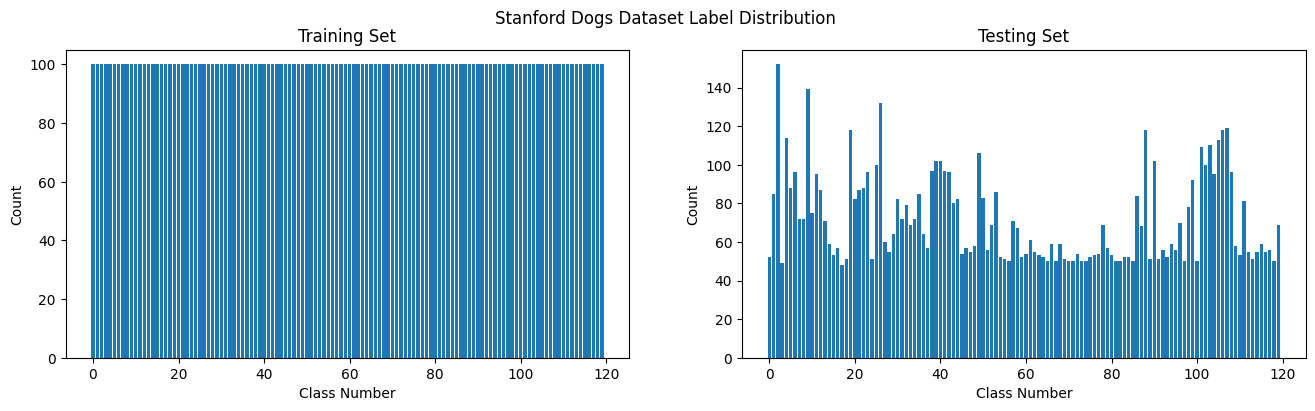

In [36]:
train_counts = train.count_labels()
test_counts = test.count_labels()

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Set')
plt.xlabel('Class Number')
plt.ylabel('Count')

plt.subplot(122)
plt.bar(test_counts.keys(), test_counts.values())
plt.title('Testing Set')
plt.xlabel('Class Number')
plt.ylabel('Count')

plt.suptitle('Stanford Dogs Dataset Label Distribution')
plt.show()